In [19]:
import pandas as pd
df = pd.read_csv("C:/Users/LOHITH/Downloads/archive/Sample - Superstore.csv", encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

total_sales, total_profit, total_orders


(np.float64(2297200.8603000003), np.float64(286397.0217), 5009)

In [13]:
df.groupby('Region')['Profit'].sum()

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

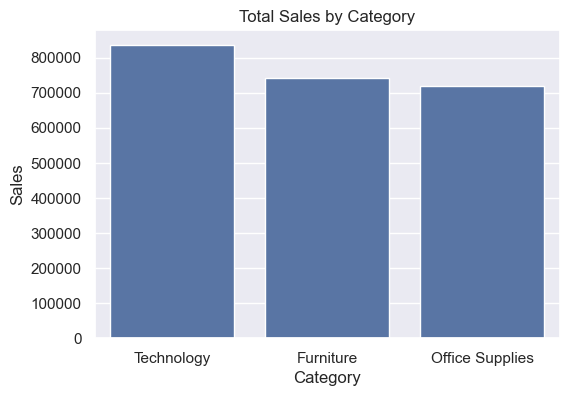

In [16]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.show()

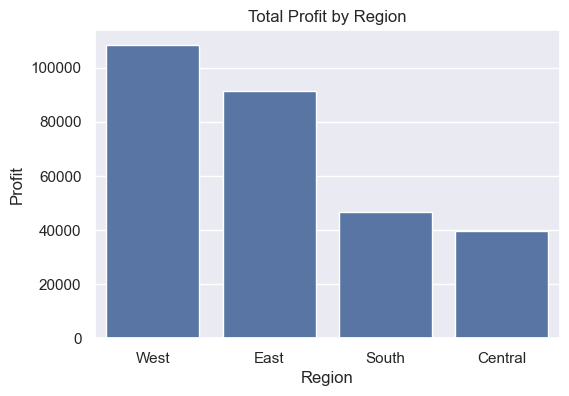

In [17]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.xlabel("Region")
plt.show()

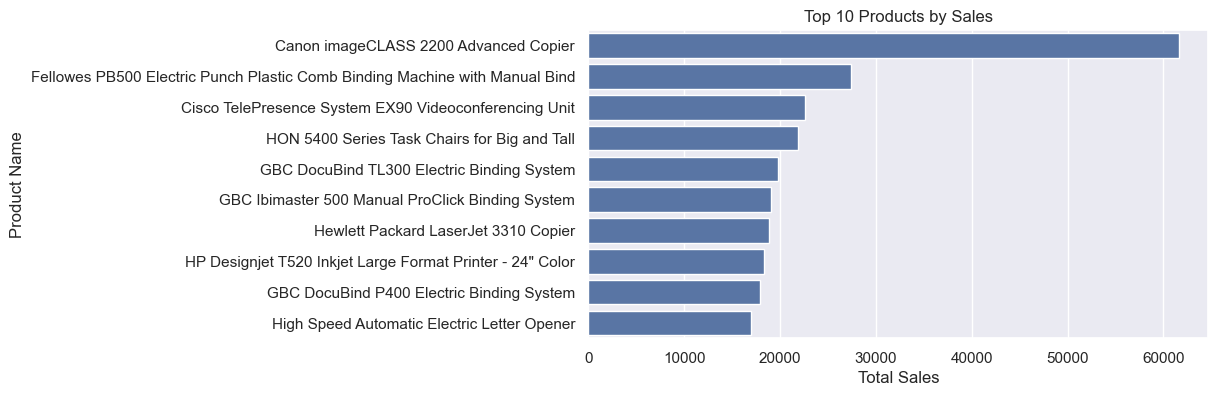

In [21]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

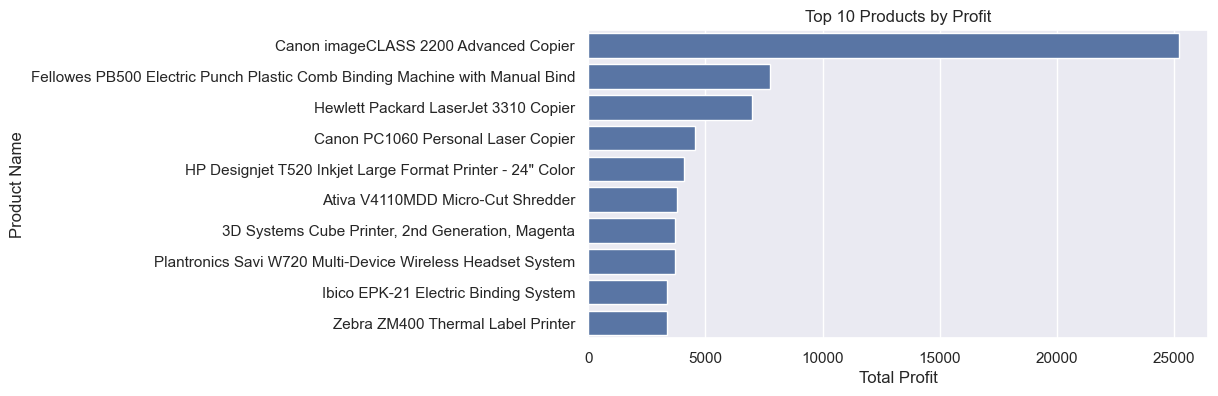

In [22]:
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_profit_products.values, y=top_profit_products.index)
plt.title("Top 10 Products by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.show()

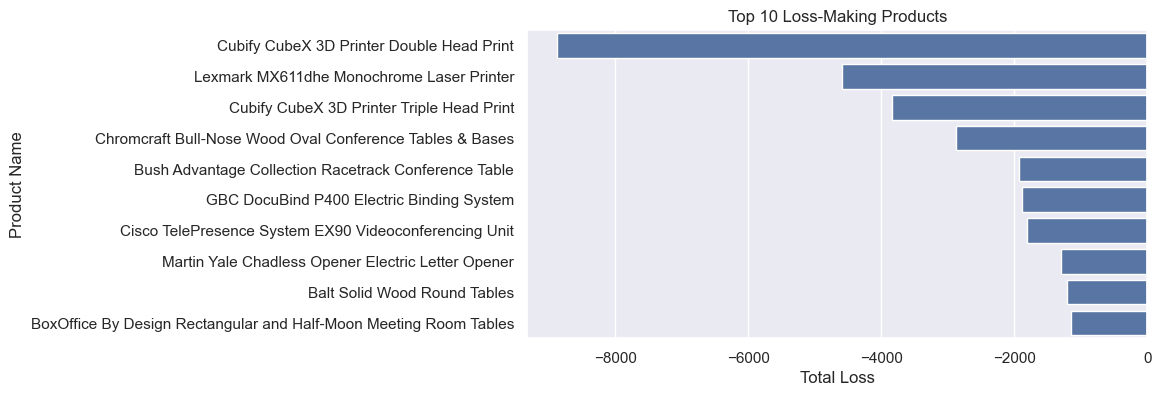

In [23]:
worst_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=worst_products.values, y=worst_products.index)
plt.title("Top 10 Loss-Making Products")
plt.xlabel("Total Loss")
plt.ylabel("Product Name")
plt.show()

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [25]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

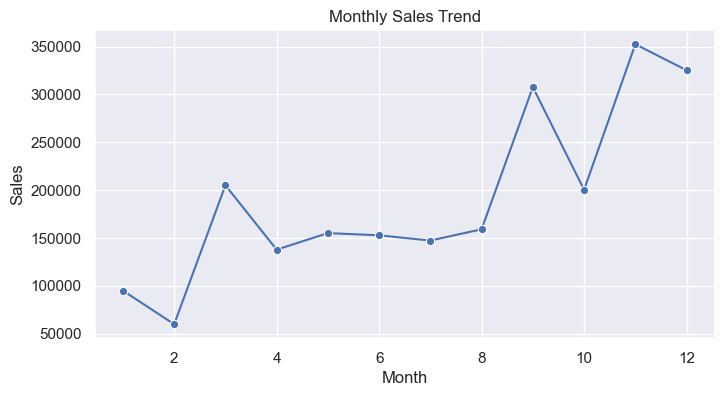

In [26]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


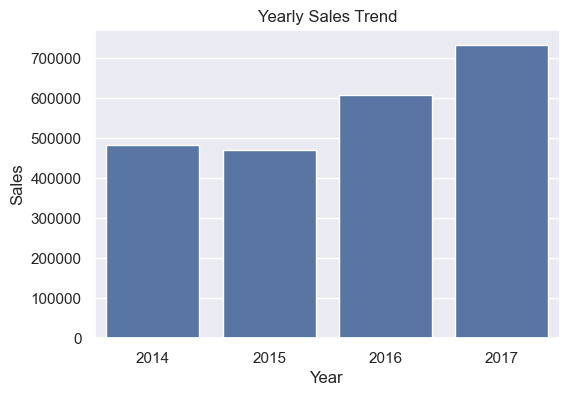

In [27]:
yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

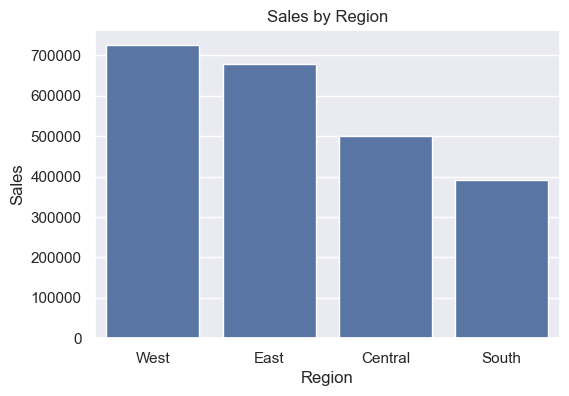

In [28]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

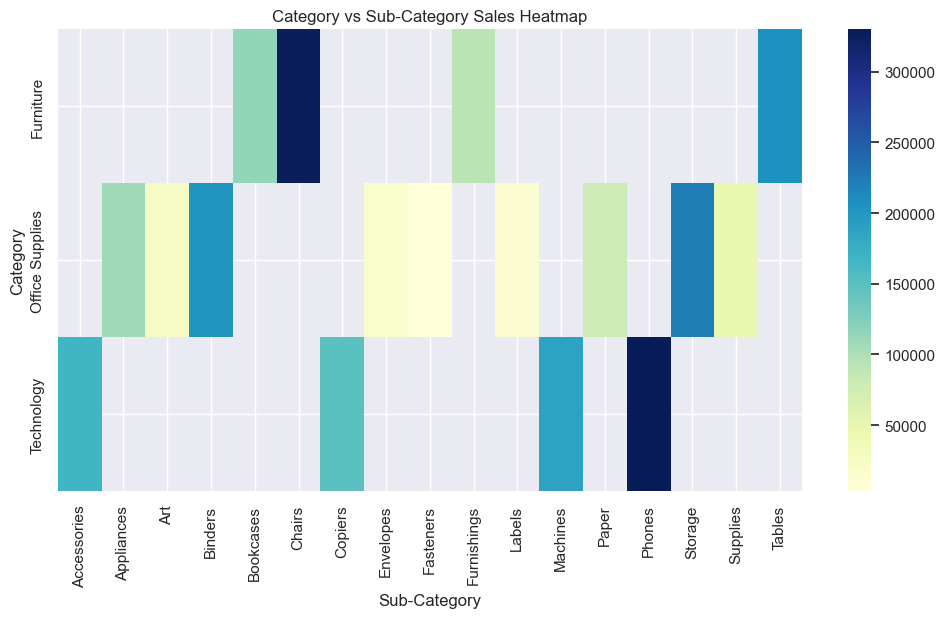

In [29]:
category_sub = df.pivot_table(
    index='Category',
    columns='Sub-Category',
    values='Sales',
    aggfunc='sum'
)

plt.figure(figsize=(12,6))
sns.heatmap(category_sub, cmap="YlGnBu")
plt.title("Category vs Sub-Category Sales Heatmap")
plt.show()

In [30]:
df_powerbi = df[['Order Date', 'Category', 'Sub-Category', 'Region', 'Sales', 'Profit', 'Quantity', 'Year', 'Month']]
df_powerbi.to_csv("superstore_cleaned.csv", index=False)

In [31]:
import os
os.getcwd()

'C:\\Users\\LOHITH'

In [32]:
import os
os.listdir()

['-1.14-windows.xml',
 '.anaconda',
 '.android',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.gitconfig',
 '.gradle',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.p2',
 '.packettracer',
 '.virtual_documents',
 '.vscode',
 '3D Objects',
 'anaconda3',
 'AppData',
 'Application Data',
 'BullseyeCoverageError.txt',
 'c tutorial',
 'Cisco Packet Tracer 8.2.2',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'helloworld.c',
 'html tutorial',
 'IdeaProjects',
 'index.html',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2744d3f4-eb5b-11ef-abf2-bb29e283be9c}.TM.blf',
 'NTUSER.DAT{2744d3f4-eb5b-11ef-abf2-bb29e283be9c}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2744d3f4-eb5b-11ef-abf2-bb29e283be9c}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
